In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 4)

# Gradient Descent

```
x = x_0
for e in range(...):
    x = x - ∂f(x)
```

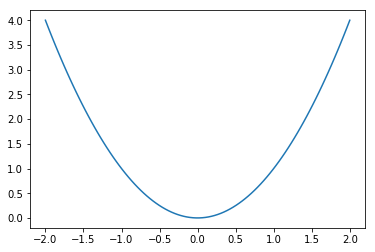

In [2]:
def f(x):
    return x ** 2

def df(x):
    return 2 * x

xrange = np.linspace(-2, 2, 100)
plt.plot(xrange, f(xrange))

In [3]:
alpha = 0.1 # tasa de aprendizaje
x = 1.5
x_hist = [x]
pct_change = []
for e in range(30):
    x = x - alpha * df(x)
    x_hist.append(x)
x_hist = np.array(x_hist)

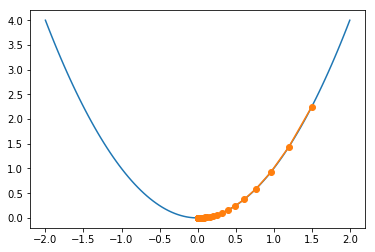

In [4]:
plt.plot(xrange, f(xrange))
plt.plot(x_hist, f(x_hist), marker="o")

## Regresión Logística

$$
    t_n | {\bf x}_n \sim \text{Bern}(\sigma({\bf w}^T {\bf x}))
$$

2

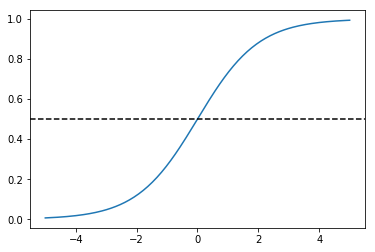

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 200)
plt.plot(x, sigmoid(x))
plt.axhline(y=0.5, linestyle="--", c="black");2

In [6]:
ipc_path = "C:/Users/Christopher/Documents/Diplomado/ipc.xlsx" # Modificar a ruta
market = pd.read_excel(ipc_path, index_col=0)
market.columns = [c.replace(" MF Equity", "").replace(" INDEX", "").replace("*", "") for c in market.columns]
market.head()

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA,MEXBOL
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


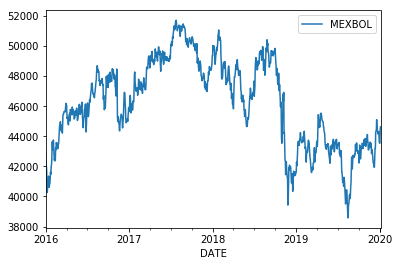

In [7]:
market[["MEXBOL"]].plot()

In [8]:
len(market)

1046

In [9]:
(market["MEXBOL"].pct_change() > 0).value_counts()

False    536
True     510
Name: MEXBOL, dtype: int64

In [10]:
# Limpiando información
y = (market["MEXBOL"].pct_change() > 0).astype(int)
y.name = "target"
X = market[["MEXBOL"]].pct_change().dropna()

X = X.join(y.shift(-1).dropna(), how="inner")

y = X["target"]
X = X[["MEXBOL"]]

In [11]:
y.value_counts()

0.0    534
1.0    510
Name: target, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=50)

In [ ]:
model = LogisticRegression(penalty="l2", C=np.inf)
res = cross_validate(model, Xtrain, ytrain, scoring="accuracy")

C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
res["test_score"]

In [ ]:
y1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
y2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(y1 == y2).mean()

$$
    Precision = \frac{TP}{TP + FP}
$$

$$
    Recall = \frac{TP}{TP + FN}
$$


$$
    F1 = \frac{2}{Recall^{-1} + Precision^{-1}}
$$

In [ ]:
model.fit(Xtrain, ytrain)

In [ ]:
yhat = model.predict(Xtest)

In [212]:
from sklearn.metrics import confusion_matrix

In [213]:
confusion_matrix(ytest, yhat, labels=[0, 1])

array([[11, 16],
       [10, 13]])

In [214]:
tp = 8
fp = 7

# % de aciertos (una vez que dedicí tomar una posición)
precision = tp / (tp + fp)
precision

0.5333333333333333

In [215]:
tp = 8
fn = 13

recall = tp / (tp + fn)
# 1 - % oportunidades no tomadas
recall

0.38095238095238093

In [216]:
# F1 score
2 / (1/ precision + 1 / recall)

0.4444444444444444

In [217]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [218]:
precision_score(ytest, yhat)

0.4482758620689655

In [219]:
recall_score(ytest, yhat)

0.5652173913043478

In [220]:
f1_score(ytest, yhat)

0.4999999999999999

In [221]:
from sklearn.metrics import precision_recall_curve

Text(0.5, 0, 'Nivel de proba asignada')

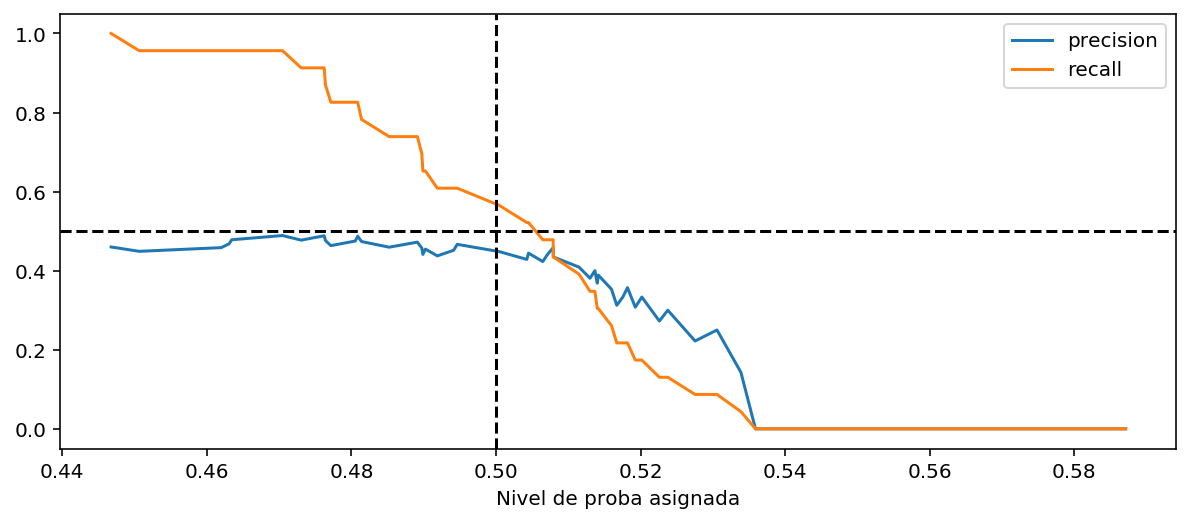

In [226]:
proba_estimate = model.predict_proba(Xtest)[:, 1]
prec, recall, threshold = precision_recall_curve(ytest, proba_estimate)

plt.plot(threshold, prec[:-1], label="precision")
plt.plot(threshold, recall[:-1], label="recall")
plt.legend()
plt.axvline(x=0.5, linestyle="--", c="black")
plt.axhline(y=0.5, linestyle="--", c="black")
plt.xlabel("Nivel de proba asignada")

## Transformando Datos

$$
    t_n | {\bf x}_n \sim \text{Bern}(\sigma({\bf w}^T \phi({\bf x})))
$$

In [240]:
import plotly.express as px

In [239]:
window = 20
market_t = market.copy()
rolling_mean = market_t.rolling(window).mean()
rolling_std =  market_t.rolling(window).std()
market_t = (market_t - rolling_mean) / rolling_std
market_t = market_t.dropna()

In [250]:
plot_data = market_t.sample(5, axis=1, random_state=3141).reset_index().melt("DATE")
px.line(plot_data, x="DATE", y="value", color="variable")

In [252]:
from statsmodels.tsa.stattools import adfuller

In [262]:
adfuller(market_t["MEXBOL"])

(-6.432293996694678,
 1.685715042930725e-08,
 0,
 653,
 {'1%': -3.4404038931945276,
  '5%': -2.865976260062519,
  '10%': -2.5691324834372633},
 1196.5078820198542)

In [271]:
y = (market_t["MEXBOL"].diff().shift(-1) > 0) * 1.0
X = market_t.drop("MEXBOL", axis=1).join(y, how="inner")

y = X["MEXBOL"]
X = X.drop("MEXBOL", axis=1)

In [272]:
train_period = "2019-10"
test_period = "2019-11-20"
Xtrain, ytrain = X[:train_period], y[:train_period]
Xtest, ytest = X[:test_period], y[:test_period]

In [280]:
model = LogisticRegression()
cross_validate(model, Xtrain, ytrain)

{'fit_time': array([0.01234388, 0.0135839 , 0.01391196, 0.01159787, 0.0081563 ]),
 'score_time': array([0.00157428, 0.00247383, 0.00115705, 0.0013721 , 0.00141096]),
 'test_score': array([0.47540984, 0.54098361, 0.54918033, 0.49586777, 0.53719008])}

In [282]:
Xtrain.columns

Index(['KIMBERA', 'GAPB', 'CEMEXCPO', 'ASURB', 'GFNORTEO', 'KOFUBL', 'AC',
       'LABB', 'FEMSAUBD', 'OMAB', 'GFINBURO', 'AMXL', 'ALSEA', 'ORBIA',
       'PE&OLES', 'GRUMAB', 'RA', 'WALMEX', 'BOLSAA', 'LIVEPOLC', 'GENTERA',
       'IENOVA', 'CUERVO', 'ELEKTRA', 'BBAJIOO', 'ALPEKA', 'MEGACPO', 'GCC',
       'BIMBOA', 'GMEXICOB', 'GCARSOA1', 'TLEVICPO', 'ALFAA', 'BSMXB',
       'PINFRA'],
      dtype='object')

# Tarea:

* Agrupar por sector (limpiar los datos)
* Entrenar una regresión Logística y encontrar los mejores hiperparámetros
* Probar cross-validation
* Graficar Precision-Recall curve

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#Scikit Learn 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, confusion_matrix

In [56]:

ipc_path = "C:/Users/Christopher/Documents/Diplomado/ipc.xlsx" # Modificar la ruta
market = pd.read_excel(ipc_path,index_col=0)
market.columns = [c.replace(" MF Equity", "").replace(" INDEX", "").replace("*", "") for c in market.columns]

emisoras_path = "C:/Users/Christopher/Documents/Diplomado/gen02/files/modulo3/bmv_emisoras.csv"
emisoras = pd.read_csv(emisoras_path, index_col=0)

In [57]:
in_emisoras = ['KIMBER','GAP','CEMEX','ASUR','GFNORTE','KOF','AC','LAB','FEMSA','OMA',
              'GFINBUR','AMX','ALSEA','ORBIA','PE&OLES','GRUMA','R','WALMEX','BOLSA','LIVEPOL','GENTERA','IENOVA',
               'CUERVO','ELEKTRA','BBAJIO','ALPEK','MEGA','GCC','BIMBO','GMEXICO','GCARSO','TLEVISA','ALFA',
               'BSMX','PINFRA','GBM']
in_market = ['KIMBERA','GAPB','CEMEXCPO','ASURB','GFNORTEO','KOFUBL','AC','LABB','FEMSAUBD','OMAB',
 'GFINBURO','AMXL','ALSEA','ORBIA','PE&OLES','GRUMAB','RA','WALMEX','BOLSAA','LIVEPOLC','GENTERA','IENOVA',
 'CUERVO','ELEKTRA','BBAJIOO','ALPEKA','MEGACPO','GCC','BIMBOA','GMEXICOB','GCARSOA1','TLEVICPO','ALFAA',
 'BSMXB','PINFRA','MEXBOL']
i = 0

for emisora in in_emisoras:
    as_list = emisoras.index.tolist()
    idx = as_list.index(emisora)
    as_list[idx] = in_market[i]
    emisoras.index = as_list
    i += 1

In [58]:

catalog = pd.DataFrame(market.columns.tolist(),columns=['key']).join(emisoras,on="key")[['key','Sector']].set_index('key')
columns = zip(catalog.Sector,catalog.index)
market.columns = pd.MultiIndex.from_tuples(columns, names = ['sector', 'emisora'])
market.head(2)

sector     PRODUCTOS DE CONSUMO FRECUENTE INDUSTRIAL MATERIALES INDUSTRIAL  \
emisora                           KIMBERA       GAPB   CEMEXCPO      ASURB   
DATE                                                                         
2016-01-01                          40.37     152.05       8.72     243.89   
2016-01-04                          39.16     148.57       8.43     238.29   

sector     SERVICIOS FINANCIEROS PRODUCTOS DE CONSUMO FRECUENTE          \
emisora                 GFNORTEO                         KOFUBL      AC   
DATE                                                                      
2016-01-01                 94.99                         123.90  104.68   
2016-01-04                 91.79                         120.29  102.09   

sector      SALUD PRODUCTOS DE CONSUMO FRECUENTE INDUSTRIAL  ...  \
emisora      LABB                       FEMSAUBD       OMAB  ...   
DATE                                                         ...   
2016-01-01  13.85                         161.63      83.61  ...   
2016-01-04  14.41                         157.62      81.77  ...   

sector     SERVICIOS DE TELECOMUNICACIONES MATERIALES  \
emisora                            MEGACPO        GCC   
DATE                                                    
2016-01-01                           64.19      44.81   
2016-01-04                           64.45      43.51   

sector     PRODUCTOS DE CONSUMO FRECUENTE MATERIALES INDUSTRIAL  \
emisora                            BIMBOA   GMEXICOB   GCARSOA1   
DATE                                                              
2016-01-01                          45.95      36.79      70.98   
2016-01-04                          45.02      35.71      69.83   

sector     SERVICIOS DE TELECOMUNICACIONES INDUSTRIAL SERVICIOS FINANCIEROS  \
emisora                           TLEVICPO      ALFAA                 BSMXB   
DATE                                                                          
2016-01-01                           94.34      34.10                 30.25   
2016-01-04                           92.62      33.74                 29.46   

sector     INDUSTRIAL SERVICIOS FINANCIEROS  
emisora        PINFRA                MEXBOL  
DATE                                         
2016-01-01     202.73               42977.5  
2016-01-04     202.93               42113.7  

[2 rows x 36 columns]

In [60]:

y = (market[("SERVICIOS FINANCIEROS","MEXBOL")].diff().shift(-1) > 0) * 1.0
y.name = 'MEXBOL'

X = market.drop(("SERVICIOS FINANCIEROS","MEXBOL"), axis=1)


X.columns = X.columns.droplevel(1)
X = X.T.groupby('sector').mean().T
X = X.join(y, how="inner")


y = X["MEXBOL"]
X = X.drop("MEXBOL", axis=1)

In [61]:

train_period = "2019-10"
test_period = "2019-11-20"
Xtrain, ytrain = X[:train_period], y[:train_period]
Xtest, ytest = X[:test_period], y[:test_period]

In [62]:
from sklearn.model_selection import GridSearchCV


pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("lor",LogisticRegression(penalty = 'l2'))
])

params = {
    "lor__C": np.logspace(-4, 4, 50),
    #'penalty': ['l1','l2']
    'lor__max_iter' : [3000],
    
}







gcv = GridSearchCV(pipe, params, scoring="accuracy", n_jobs=-1)

In [35]:
gcv.fit(Xtrain, ytrain)

C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)), ('lor', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'lor__C': array([1.00000e-04, 1.45635e-04, 2.12095e-04, 3.08884e-04, 4.49843e-04,
       6.55129e-04, 9.54095e-04, 1.38950e-03, 2.02359e-03, 2.94705e-03,
       4.29193e-03, 6.25055e-03, 9.10298e-03, 1.32571e-02, 1.93070e-02,
       2.81177e-02, 4.09492e-02, 5.96362e-02, 8.68511e-02, 1.2...,
       2.22300e+03, 3.23746e+03, 4.71487e+03, 6.86649e+03, 1.00000e+04]), 'lor__max_iter': [3000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
  

In [36]:

res = cross_validate(gcv, Xtrain, ytrain, scoring="accuracy")
res['test_score']

C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5

array([0.46706587, 0.41916168, 0.46084337])

In [37]:
yhat = gcv.predict(Xtest)

In [38]:
confusion_matrix(ytest, yhat, labels=[0, 1])

array([[336, 183],
       [200, 295]], dtype=int64)

In [39]:
precision_score(ytest, yhat)

0.6171548117154811

In [40]:
recall_score(ytest, yhat)

0.5959595959595959

Text(0.5, 0, 'Nivel de proba asignada')

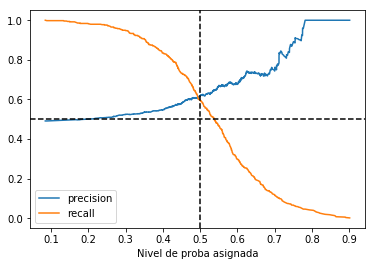

In [42]:
proba_estimate = gcv.predict_proba(Xtest)[:, 1]
precision, recall, threshold = precision_recall_curve(ytest, proba_estimate)

plt.plot(threshold, precision[:-1], label="precision")
plt.plot(threshold, recall[:-1], label="recall")
plt.legend()
plt.axvline(x=0.5, linestyle="--", c="black")
plt.axhline(y=0.5, linestyle="--", c="black")
plt.xlabel("Nivel de proba asignada")